# RISS 해외 논문 데이터 전처리

# 순서 정리

1. riss 100*10 files download<br/>
2. read excel file -> list[df, df, df, ...]<br/>
3. df_all <- list[df, df, df] concat<br/>
4. extract title column!<br/>
5. preprocessing all_title => to words list<br/>
    a. english start words -> to list<br/>
    b. word_tokenize(lower())<br/>
    c. stopwords processing<br/>
    d. lemmatize process<br/>
6. reduce(2nd list -> 1st list)<br/>
7. Counter<br/>
8. dict() <- most_common(20)<br/>
9. dict() <- (len(word) > 1) filtering<br/>
10. bar plot()

In [3]:
import pandas as pd
import glob
import re
import nltk
from functools import reduce

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer

from collections import Counter

import matplotlib.pyplot as plt
from wordcloud import WordCloud, STOPWORDS

# 파일 병합

In [4]:
all_files = glob.glob('./job_influence_data/my*.xls')
all_files

['./job_influence_data\\myCabinetExcelData (1).xls',
 './job_influence_data\\myCabinetExcelData (2).xls',
 './job_influence_data\\myCabinetExcelData (3).xls',
 './job_influence_data\\myCabinetExcelData (4).xls',
 './job_influence_data\\myCabinetExcelData (5).xls',
 './job_influence_data\\myCabinetExcelData (6).xls',
 './job_influence_data\\myCabinetExcelData (7).xls',
 './job_influence_data\\myCabinetExcelData.xls']

In [6]:
# 저장할 리스트
all_files_data = []

for file in all_files:
    data_frame = pd.read_excel(file)
    all_files_data.append(data_frame)
    
# all_files_data[0]

In [8]:
all_files_data_concat = pd.concat(all_files_data, axis=0, ignore_index=True)

# all_files_data_concat

In [9]:
all_files_data_concat.to_csv('./job_influence_data/riss_bigdata.csv', encoding='utf-8', index=False)

# 데이터 전처리 (Pre-processing)

In [12]:
# 제목 추출
all_title = all_files_data_concat['제목']

all_title

0      Does working with the Veder Contact Method inf...
1      Technological disruption and employment: The i...
2      Affective well-being and within-day beliefs ab...
3      Commitment to Social Justice and its Influence...
4      Salesperson Perceptions of Ethical Behaviors: ...
                             ...                        
763    Organizational Climate Perception and its Infl...
764    Does work engagement mediate the influence of ...
765    HOW SOCIAL DOMINANCE ORIENTATION AND JOB STATU...
766    Understanding teleworkers’ technostress and it...
767    Work during COVID-19: assessing the influence ...
Name: 제목, Length: 768, dtype: object

- iterator data(반복자) - list, Series, tuple

In [14]:
stopwords = set(stopwords.words('english'))
lemma = WordNetLemmatizer()

In [16]:
words = []

for title in all_title:
    # print(title)
    EnWords = re.sub(r"[^a-zA-Z]+", " ", str(title))   
    # print(EnWords)
    EnWordsToken = word_tokenize(EnWords.lower())
    # print(EnWordsToken),  #익명함수, 클로저 
    EnWordsTokenStop = [w for w in EnWordsToken if w not in stopwords]
    # print(EnWordsTokenStop)
    EnWordsTokenStopLemma = [lemma.lemmatize(w) for w in EnWordsTokenStop]
    # print(EnWordsTokenStopLemma)
    words.append(EnWordsTokenStopLemma)

In [17]:
words2 = reduce(lambda x, y: x + y, words)
print(type(words2))
words2[:10]

<class 'list'>


['working',
 'veder',
 'contact',
 'method',
 'influence',
 'job',
 'satisfaction',
 'caregiver',
 'non',
 'randomized']

# 데이터 탐색
## 단어 빈도 탐색

In [19]:
count = Counter(words2)
# count

In [20]:
word_count = dict()

for tag, counts in count.most_common(50):
    if(len(str(tag)) > 1):
        word_count[tag] = counts
        print(f'{tag} : {counts}')

job : 822
influence : 667
satisfaction : 294
factor : 119
performance : 101
work : 100
influencing : 94
employee : 92
nurse : 65
organizational : 64
study : 63
commitment : 62
among : 56
stress : 56
role : 48
characteristic : 46
worker : 45
intention : 44
perception : 40
turnover : 37
behavior : 37
self : 36
leadership : 36
social : 35
health : 34
burnout : 33
teacher : 32
attitude : 31
perceived : 30
effect : 30
manager : 28
relationship : 28
engagement : 27
support : 27
related : 27
outcome : 26
resource : 25
care : 24
individual : 23
family : 22
organisational : 21
career : 20
practice : 20
level : 20
service : 19
analysis : 19
efficacy : 19
personality : 19
demand : 18
mediating : 18


- 검색어로 사용한 job과 influence 빈도가 압도적으로 많으므로, 이를 제거한다.

In [21]:
del word_count['job']
del word_count['influence']

In [22]:
key_list = list(word_count.keys())
key_list[:10]

['satisfaction',
 'factor',
 'performance',
 'work',
 'influencing',
 'employee',
 'nurse',
 'organizational',
 'study',
 'commitment']

# 단어 빈도 히스토그램

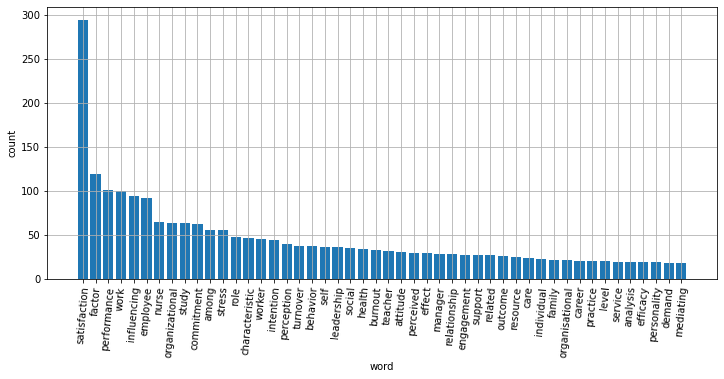

In [24]:
# 히스토그램 표시 옵션
plt.figure(figsize=(12,5))
plt.xlabel('word')
plt.ylabel('count')
plt.grid(True)

plt.bar(range(len(word_count)), word_count.values())
plt.xticks(range(len(word_count)), word_count.keys(), rotation='85')
plt.show()